### The Basics

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns
# df.columns.to_list()

In [ ]:
df.index

In [ ]:
df.set_index("id")

### Indexing

In [ ]:
df["email"].head()
df.email.tail()

In [ ]:
df[10:20]  # [a, b] b exclus

In [ ]:
df.loc[10:20]  # [a, b] les deux inclus

In [ ]:
# selectionner avec un index different et un element particulier
df_email = df.set_index("email")
elem = df_email.loc["kbeasant4@jigsy.com"]
# renvoie les infos relatives a cet element (de type Series)
# si on veut recup les valeurs on utilise l'attribut `values`
elem.values  # objet array
elem.values.tolist()  # std python list

In [ ]:
# avec `loc` on peut egalement aller chercher plusieurs elements en une fois
elem = df_email.loc[
    ["bwymanb@lulu.com", "omaryone@va.gov", "smounchj@rakuten.co.jp"]
]
elem  # type DataFrame
elem.values  # objet
# elem.values.tolist()    # std python list of lists

### Filter

In [ ]:
# recup une colonne
df["gender"]

In [ ]:
# filtrer par rapport a la valeur 'Male'
male_filter = df["gender"] == "Male"
df[male_filter]
# or just `df[df['gender'] == 'Male']`

In [ ]:
country_filter = df.country.isin(["France", "Canada"])
df[country_filter].head(10)

In [ ]:
# filter sur la colonne ;price_paid;
# d'abord faisons une copy de la DataFrame
# avant de porter les modifications
df_price = df.copy()
# mnt il faut enlever le signe $
# on utilise la methode `apply()` sur la colonne et un lambda
df_price.price_paid = df_price.price_paid.apply(lambda x: x.replace("$", ""))
# on le convertit en nombre flottant
df_price.price_paid = df_price.price_paid.astype(float)
# on applique le filtre
df_price[df_price["price_paid"] >= 6.0]
# if you want it
# df_price.price_paid.sum()

### Delete row / col

In [ ]:
# 1) avec drop()
# on supprime la colonne 'ip_address' en specifiant l'axe
df.drop("ip_address", axis=1)
# et si je veux que le changement soit permanent
# je rajoute le parametre ;inplace=True;
# df.drop('ip_address', axis=1, inplace=True)

In [ ]:
# on peut aussi supprimer une ligne
# mettons d'abord la colonne 'gender' comme index
# df.set_index('gender', inplace=True)
# on supprime toutes les lignes ou gender == 'Male'
df.drop("Male", axis=0, inplace=True)
df

In [ ]:
# on peut aussi supprimer plusieurs colonnes d'un coup
df.drop(["first_name", "last_name", "email"], axis=1, inplace=True)
df

In [ ]:
# 2) avec `del`
# la on a pas besoin de specifier l'axe ni le parametre inplace
# pour supprimer la colonne 'id'
del df["id"]
df

### Add a column

In [ ]:
# on va rajouter une colonne pour le prix hors tax
# mais d'abord il faut remplacer les valuers nulles et
# gerer les types comme on avait fait plus tot dans la serie
df["tax"].fillna(0, inplace=True)
df.price_paid = df.price_paid.apply(lambda x: x.replace("$", ""))
df.price_paid = df.price_paid.astype(float)

In [ ]:
df["price_net"] = round((df["price_paid"] * (1 - df["tax"] / 100)), 2)
df

In [ ]:
# et si par un simple hasard on voulait remplacer
# le nom des pays par leur code
# pour cela on va donc faire un 'mapping'

In [ ]:
# d'abord creons un dictionnaire avec nos differentes valeurs
countries = {
    "Canada": "CA",
    "United States": "USA",
    "France": "FR",
    "Morocco": "MA",
}

In [ ]:
# puis avec l'instruction `map()`
df["country_code"] = df.country.map(countries)
df

### Basic Analysis

In [11]:
# info at a glance about the DataFrame
df.describe()
# or a particular column
df["price_paid"].describe()
# or all the columns
df.describe(include="all")

,id,date,first_name,last_name,email,gender,country,price_paid,tax,price_net,country_code
count,1000.000000,1000,1000,1000,1000,931,956,1000.000000,1000.000000,1000.000000,956
unique,NaN,30,926,991,1000,2,4,NaN,NaN,NaN,4
top,NaN,03/20/2021,Nonie,Aggott,malders0@shop-pro.jp,Female,France,NaN,NaN,NaN,FR
freq,NaN,47,3,2,1,493,408,NaN,NaN,NaN,408
mean,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,6.461930,13.080000,5.628470,NaN
std,288.819436,NaN,NaN,NaN,NaN,NaN,NaN,2.061968,9.518624,1.943679,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,2.400000,NaN
25%,250.750000,NaN,NaN,NaN,NaN,NaN,NaN,4.620000,0.000000,3.980000,NaN
50%,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,6.415000,20.000000,5.615000,NaN
75%,750.250000,NaN,NaN,NaN,NaN,NaN,NaN,8.232500,20.000000,7.065000,NaN


In [12]:
# la moyenne d'une colonne
df.tax.mean()

13.08

In [13]:
# la somme
df["price_paid"].sum()

6461.93

In [17]:
# la valeur maximale / minimale d'une colonne
df.tax.max()
df["price_net"].min()

2.4

In [20]:
# trouver les valeurs uniques sur une colonne
df["country"].unique()
# df.price_net.unique()

array(['Canada', 'United States', 'Morocco', 'France', nan], dtype=object)

In [34]:
# trouver la quantite d'entrees dans une categorie
df["gender"].value_counts()
# on peut lui passer le parametre `normalize=True`
# pour obtenir le resultat sous forme de pourcentage
df.gender.value_counts(normalize=True)

Female    0.529538
Male      0.470462
Name: gender, dtype: float64

In [46]:
df

,id,date,first_name,last_name,email,gender,country,price_paid,tax,price_net,country_code
0,1,03/28/2021,Marylin,Alders,malders0@shop-pro.jp,Male,Canada,5.36,0.0,5.36,CA
1,2,03/19/2021,Hinda,Harridge,hharridge1@gnu.org,Female,Canada,8.32,0.0,8.32,CA
2,3,03/17/2021,Erl,Kilminster,ekilminster2@etsy.com,Male,United States,3.73,20.0,2.98,USA
3,4,03/19/2021,Grata,Brantl,gbrantl3@umn.edu,Female,United States,3.70,20.0,2.96,USA
4,5,03/24/2021,Kanya,Beasant,kbeasant4@jigsy.com,Male,Morocco,9.24,20.0,7.39,MA
...,...,...,...,...,...,...,...,...,...,...,...
995,996,03/24/2021,Duff,Errigo,derrigorn@elpais.com,Female,France,3.63,0.0,3.63,FR
996,997,03/17/2021,Ame,Rastall,arastallro@toplist.cz,Female,NaN,4.59,20.0,3.67,NaN
997,998,03/13/2021,Betty,Stickels,bstickelsrp@cloudflare.com,Male,United States,7.54,20.0,6.03,USA
998,999,03/17/2021,Paquito,Tesoe,ptesoerq@rakuten.co.jp,Male,United States,5.81,0.0,5.81,USA


#### The `groupby` method

In [51]:
# disons qu'on veux calculer la somme des transactions
# mais qu'on le veux par pays
# c'est la fonction de la methode `groupby()`
df.groupby("country").sum()
# et si on voulait la moyenne mais par genre
df.groupby("gender").mean()
# ou la valeur minimale mais par taxe
# df.groupby('tax').min()
# etc...

gender
Female    5.581724
Male      5.640822
Name: price_net, dtype: float64

In [ ]:
# on pourrait egalement cibler une ligne en particulier
# par exemple le prix hors taxe moyen par genre
df.groupby("gender")["price_net"].mean()

In [62]:
# on peut meme aller plus loin en considerant
# plusieurs groupes
# e.g. la moyenne par genre par pays
df.groupby(["country", "gender"]).mean()

id  price_paid        tax  price_net
country       gender                                              
Canada        Female  461.472973    6.419324  13.513514   5.550541
              Male    406.000000    6.117467  13.600000   5.325600
France        Female  512.648241    6.350352  12.060302   5.578744
              Male    534.928177    6.498950  13.038674   5.681160
Morocco       Female  479.925926    7.024815  17.037037   5.861852
              Male    483.652174    6.146957  12.173913   5.379130
United States Female  487.282353    6.437118  13.529412   5.573824
              Male    525.284722    6.672500  13.472222   5.784167

### Basic plotting

In [58]:
# disons qu'on veut savoir le chiffre d'affaires
# total par jour dans notre DF
df.groupby("date")["price_paid"].sum()

date
03/01/2021    216.01
03/02/2021    262.92
03/03/2021    207.17
03/04/2021    218.45
03/05/2021    215.71
03/06/2021    202.90
03/07/2021    212.56
03/08/2021    158.94
03/09/2021    210.19
03/10/2021    201.72
03/11/2021    161.38
03/12/2021    198.21
03/13/2021    216.20
03/14/2021    267.04
03/15/2021    165.82
03/16/2021    277.60
03/17/2021    203.39
03/18/2021    189.62
03/19/2021    272.92
03/20/2021    292.83
03/21/2021    231.46
03/22/2021    218.67
03/23/2021    228.32
03/24/2021    193.71
03/25/2021    194.04
03/26/2021    185.12
03/27/2021    250.63
03/28/2021    233.76
03/29/2021    226.65
03/30/2021    147.99
Name: price_paid, dtype: float64

<AxesSubplot:xlabel='date'>

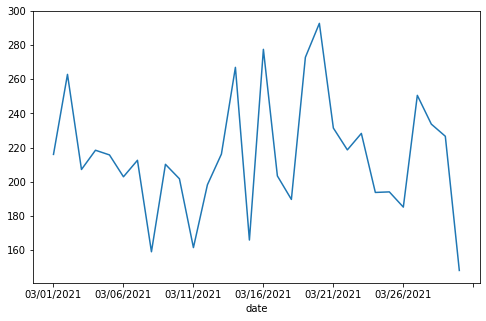

In [116]:
# mais au lieu de toutes ces lignes on veut un graphique
# c'est la que `matplotlib` fait son entree
# df.groupby('date')['price_paid'].sum().plot()
# NOTE on a pas eu besoin d'utiliser la bibliotheque
# parce que pandas vient avec la methode `plot()`
# on peut bien-entendu indiquer la taille du rendu
# `figsize([width, height])` in INCHES
df.groupby("date")["price_paid"].sum().plot(
    figsize=[8, 5]
)  # plot (default: line)

#### Other chart types

<AxesSubplot:title={'center':'Le prix total moyen par pays'}, ylabel='price_paid'>

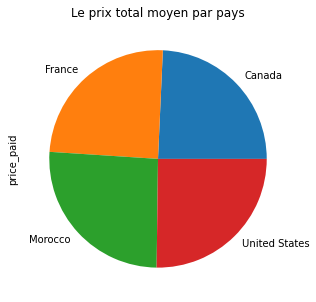

In [114]:
# si au lieu d'une courbe on voulait un graphique en secteur (camembert)
# df.groupby('country')['price_paid'].mean().plot.pie()
# et qu'on voulait un titre aussi
caption = "Le prix total moyen par pays"
df.groupby("country")["price_paid"].mean().plot.pie(
    title=caption, figsize=(8, 5)
)

`plot` accepte les methodes ('kind', types de graphique):<br />
- line
- bar (vertical)
- barh (horizontal)
- hist
- box
- kde (requires `scipy` module)
- density (same as kde)
- area
- pie
- scatter
- hexbin

<AxesSubplot:xlabel='country'>

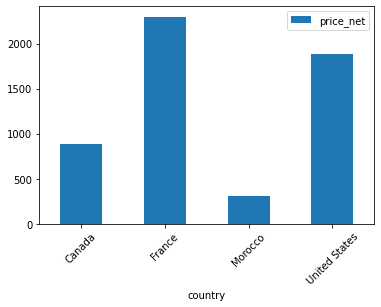

In [120]:
df.groupby("country")["price_net"].sum().plot.bar(rot=45, legend=True)